### Description 

Carotid intima–media thickness computed from carotid ultrasound imaging.

### Introduction

Carotid intima-media thickness (CIMT) measurement is an ultrasound-based technique used to assess the thickness of the innermost two layers of the carotid artery, known as the intima and media. These layers can become thickened due to atherosclerotic processes or due to age. The thickening of the intima-media layer can be throughout the length of the artery (increased IMT) or as local accumulation of fatty deposits that penetrate into the vessel interior known  as plaques. Advanced plaques can cause stenosis of the artery. Carotid IMT is increasingly used as an indicator of early atherosclerosis and a predictor for cardiovascular events and can be used for identifying asymptomatic patients at high risk who might be candidates for more intensive medical interventions. Measurement of CIMT with B-mode ultrasound is a noninvasive, sensitive, and reproducible technique for identifying and quantifying subclinical vascular disease and for evaluating CVD risk.

The ultrasound probe is placed on the skin over the carotid artery and high-frequency sound waves are used to produce images of the artery. These images are then analyzed using an automatic detection algorithm to measure the thickness of the intima and media layers. 

### Measurement protocol 
<!-- long measurment protocol for the data browser -->
Carotid US was performed using the Supersonic Aixplorer MACH 30 (Hologic, USA). Carotid Intima Media (CIMT) was measured using the L10-2 transducer from both carotid arteries while the subject in supine position with head rotated to the opposite side of the measured artery. Evaluation was performed using an automatic computerized system (Aixplorer Mach 30). The intima and media are automatically traced within the box of interest. Mean CIMT was recorded over a length of 1 cm at the far wall of each carotid artery. One measurement was obtained from each carotid artery. Only parts of the carotid artery without plaques were included in the IMT analysis.

![IMT example](012-carotid_ultrasound/imt_lt_sample.png)

### Data availability 
<!-- for the example notebooks -->
The information is stored in 1 parquet file: `carotid_ultrasound.parquet`

### Summary of available data 
<!-- for the data browser -->
1. Ultrasound images of the left and right carotid arteries.
2. DICOM files of the test.
3. Right and left Intima Media Thickness.
4. Percentages of fit and width of the box of interest for which the IMT is calculated.

### Relevant links

- [Pheno Knowledgebase](https://knowledgebase.pheno.ai/datasets/012-carotid_ultrasound.html)
- [Pheno Data Browser](https://pheno-demo-app.vercel.app/folder/12)

In [1]:
#| echo: false
import pandas as pd
pd.set_option("display.max_rows", 500)

In [2]:
from pheno_utils import PhenoLoader

In [3]:
pl = PhenoLoader('carotid_ultrasound')
pl

PhenoLoader for carotid_ultrasound with
11 fields
2 tables: ['carotid_ultrasound', 'age_sex']

# Data dictionary

In [4]:
pl.dict

,field_string,description_string,folder_id,feature_set,field_type,strata,data_coding,array,pandas_dtype,bulk_file_extension,relative_location,units,bulk_dictionary,sampling_rate,transformation,list_of_tags,stability,sexed,debut,completed
tabular_field_name,,,,,,,,,,,,,,,,,,,,
timezone,Timezone,Timezone at collection,12,carotid_ultrasound,Categorical (single),Collection time,001_03,Single,category,NaN,carotid_ultrasound/carotid_ultrasound.parquet,NaN,NaN,NaN,NaN,NaN,Accruing,Both sexes,2021-08-16,NaN
collection_date,Collection date (YYYY-MM-DD),Collection date (YYYY-MM-DD),12,carotid_ultrasound,Date,Collection time,NaN,Single,datetime64[ns],NaN,carotid_ultrasound/carotid_ultrasound.parquet,NaN,NaN,NaN,NaN,NaN,Accruing,Both sexes,2021-08-16,NaN
collection_timestamp,Collection timestamp,Collection timestamp,12,carotid_ultrasound,Datetime,Collection time,NaN,Single,"datetime64[ns, Asia/Jerusalem]",NaN,carotid_ultrasound/carotid_ultrasound.parquet,NaN,NaN,NaN,NaN,NaN,Accruing,Both sexes,2021-08-16,NaN
imt_left,Intima media thickness (left),Intima Media Thickness (IMT) measurement is an...,12,carotid_ultrasound,Continuous,Primary,NaN,Single,float,NaN,carotid_ultrasound/carotid_ultrasound.parquet,mm,NaN,NaN,NaN,NaN,Accruing,Both sexes,2021-08-16,NaN
imt_right,Intima media thickness (right),Intima Media Thickness (IMT) measurement is an...,12,carotid_ultrasound,Continuous,Primary,NaN,Single,float,NaN,carotid_ultrasound/carotid_ultrasound.parquet,mm,NaN,NaN,NaN,NaN,Accruing,Both sexes,2021-08-16,NaN
imt_window_width_left,IMT window width (left),Indicates the width if the box of interest,12,carotid_ultrasound,Continuous,Auxiliary,NaN,Single,float,NaN,carotid_ultrasound/carotid_ultrasound.parquet,mm,NaN,NaN,NaN,NaN,Accruing,Both sexes,2021-08-16,NaN
imt_window_width_right,IMT window width (right),Indicates the width if the box of interest,12,carotid_ultrasound,Continuous,Auxiliary,NaN,Single,float,NaN,carotid_ultrasound/carotid_ultrasound.parquet,mm,NaN,NaN,NaN,NaN,Accruing,Both sexes,2021-08-16,NaN
imt_fit_left,Intima media thickness Fit (left),Percentage of the box of interest for which th...,12,carotid_ultrasound,Continuous,Auxiliary,NaN,Single,float,NaN,carotid_ultrasound/carotid_ultrasound.parquet,%,NaN,NaN,NaN,NaN,Accruing,Both sexes,2021-08-16,NaN
imt_fit_right,Intima media thickness Fit (right),Percentage of the box of interest for which th...,12,carotid_ultrasound,Continuous,Auxiliary,NaN,Single,float,NaN,carotid_ultrasound/carotid_ultrasound.parquet,%,NaN,NaN,NaN,NaN,Accruing,Both sexes,2021-08-16,NaN


# Plot histogram and ecdf for imt_left at baseline visit


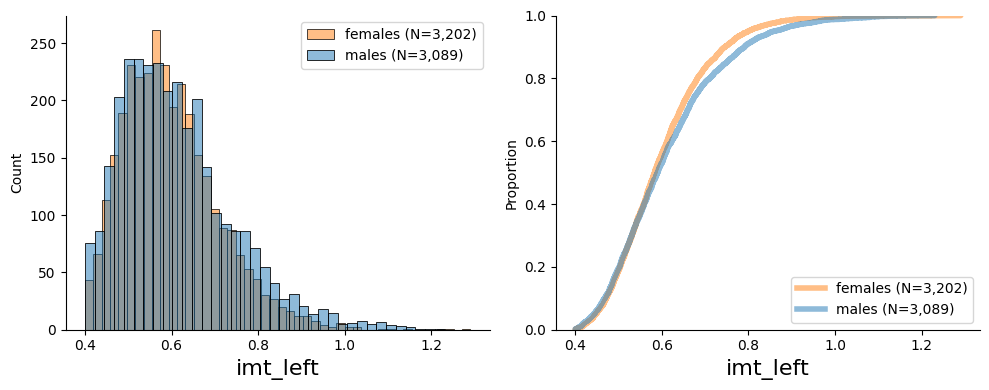

,count,mean,std,min,25%,50%,75%,max
imt_left,6291.0,0.60545,0.121213,0.4,0.517,0.586,0.67,1.29


In [5]:
from pheno_utils.basic_plots import hist_ecdf_plots

col = "imt_left"
df = pl[[col] + ["age", "sex", "collection_date"]].loc[:,:,"00_00_visit",0,:]

# plot histogram and ecdf
hist_ecdf_plots(df.dropna(subset=[col,"sex", "age"]), col, gender_col="sex")

# stats
display(df[col].describe().to_frame().T)